---
## Load data into dataframes and combine them to one: 

In [1]:
%matplotlib inline
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = pd.read_csv("city_data.csv")
ride_data_to_load = pd.read_csv("ride_data.csv")

# Join 2 dataframes
combined_data = pd.merge(city_data_to_load,ride_data_to_load,on='city',how='right')


---
## Dataframe 1: 
- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)

In [2]:
#dataframe: Total Fares, Total Rides, Total Drivers by City Type
df1 = combined_data.groupby(["city"]).agg({"fare":'mean',
                                           "ride_id": 'count',
                                           "driver_count": 'first',
                                           "type": 'first'})
df1.head()


,fare,ride_id,driver_count,type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


---
## Bubble Plot : 
- Average Fare ($) Per City
- Total Number of Rides Per City
- Total Number of Drivers Per City
- City Type (Urban, Suburban, Rural)

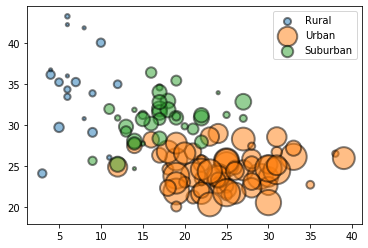

In [3]:
# use the scatter function
labels=list(set(df1.type))
nCityType = len(labels)

for i in range(nCityType):
    plt.scatter(  df1[df1['type']==labels[i]].ride_id, 
                  df1[df1['type']==labels[i]].fare, 
                s=df1[df1['type']==labels[i]].driver_count*10,
                alpha=0.5, linewidth=2,edgecolors='black',
                label=labels[i])
       
plt.legend()
plt.show()


---
## Dataframe2: % of Total Fares, Total Rides, Total Drivers by City Type

In [4]:
#dataframe: Total Fares, Total Rides, Total Drivers by City Type
df2 = combined_data.groupby(["type"]).agg({"fare":'sum',
                                           "ride_id": 'count',
                                           "driver_count": 'first'})
# convert to %
df2 = df2/df2.sum() * 100.0
df2

,fare,ride_id,driver_count
type,,,
Rural,6.811493,5.263158,13.461538
Suburban,30.463872,26.315789,13.461538
Urban,62.724635,68.421053,73.076923


---
## Pie Chart 1: % of Total Fares by City Type

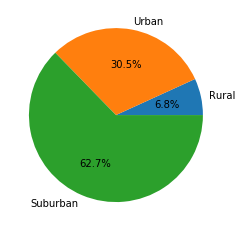

In [5]:
plt.pie(df2.fare,labels=list(set(df1.type)), autopct='%1.1f%%')
plt.show()


---
## Pie Chart 2: % of Total Rides by City Type

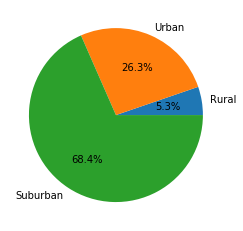

In [6]:
plt.pie(df2.ride_id,labels=list(set(df1.type)), autopct='%1.1f%%')
plt.show()


---
## Pie Chart 3: % of Total Drivers by City Type

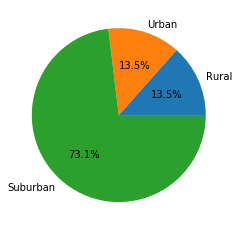

In [7]:
plt.pie(df2.driver_count,labels=list(set(df1.type)), autopct='%1.1f%%')
plt.show()

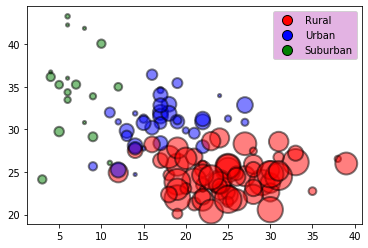

In [8]:
import matplotlib.patches as mpatches



labels=list(set(df1.type))
colors=['r','b','g']

#red_patch = mpatches.Patch(color=list(['r','b','g']), label=list(['Urban','Suburban','Rural']))
#plt.legend(handles=[red_patch])

plt.scatter( df1.ride_id, 
            df1.fare, 
                s=df1.driver_count*10,
                alpha=0.5, linewidth=2,
                c=df1.type.map({'Urban':'r','Suburban':'b','Rural':'g'}),
                edgecolors='black')
#                label=list(df1.type))

# make legend       
patches = [ plt.plot([],[], 
                     marker="o",
                     markeredgecolor='black',
                     ms=10, ls="",
                     color=colors[i], 
                     label=labels[i]) [0]   for i in range(len(labels)) ]
plt.legend(handles=patches, facecolor="plum",loc='upper right' )

plt.show()